C:\Users\steve\Clio_Muse Data Analysis Project\functions.py:341: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)
C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 

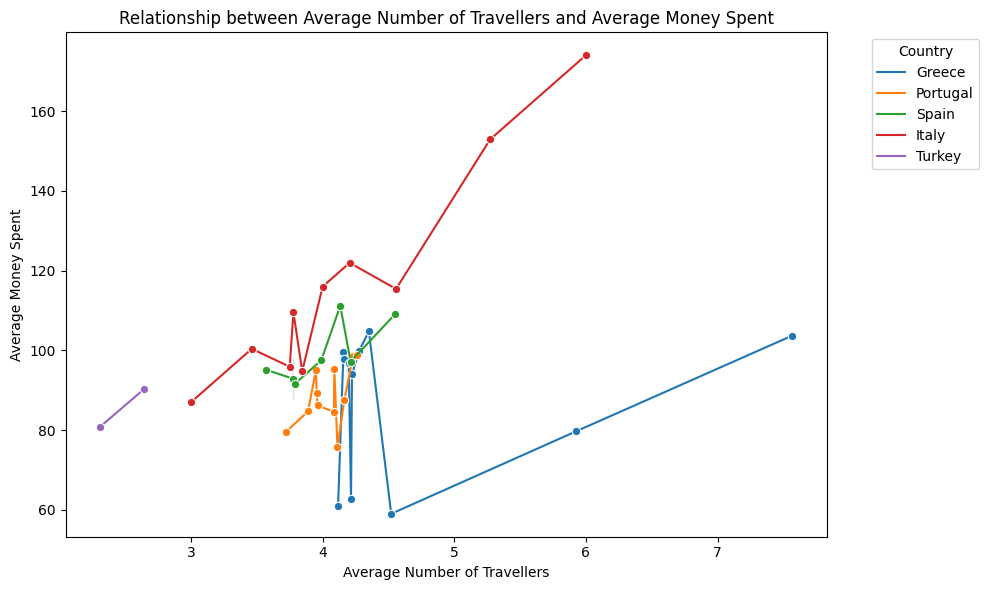

In [1]:
from functions import *
from clio import *
import numpy as np
import pandas as pd
from visualization import plot_travellers_vs_spending
from functions import read_files, save_to_excel, successful_tour_looks_like, which_tours_go_together, edit_dfs, which_tours_do_we_recommend_to_a_traveller, add_df2_profit

In [2]:
#From here and on, our script starts executing
dataframe1, dataframe2 = read_files()

In [3]:
#do a minor edit in df1 so as to have all split product codes saved as a set
dataframe1, dataframe2 = edit_dfs(dataframe1, dataframe2)

C:\Users\steve\Clio_Muse Data Analysis Project\functions.py:341: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dataframe1['booking_date'] = pd.to_datetime(dataframe1['booking_date'], dayfirst=True)


In [4]:
#add profit to dataframe2
dataframe2 = add_df2_profit(dataframe1, dataframe2)

In [5]:
#which tours go together?
go_together = which_tours_go_together(dataframe1, dataframe2)

In [6]:
#how does a successful tour look like?
successful = successful_tour_looks_like(dataframe1, dataframe2)

In [7]:
#which tours do we recommend to a traveller?
which_tours_do_we_recommend_to_a_traveller(dataframe1, dataframe2, go_together)

In [8]:
save_to_excel(dataframe1, dataframe2)


In [1]:
from IPython.display import display
display(dataframe1)

NameError: name 'dataframe1' is not defined

In [10]:
dataframe2.head(5)

,Practical Information,Product Code and Name,Unnamed: 2,Qualitative Information - Findings,Unnamed: 4,Unnamed: 5,Experience,month,Unnamed: 0,Reviews,Unnamed: 7,Unnamed: 8,Unnamed: 9,Product Code,Name of Product,split_product_code,Country,language,split_product_codes,Profit
0,Important Information,Name of Product Reviewed,Review,Content,Technology,Customer Support,Overall Experience,January,NaN,NaN,NaN,NaN,NaN,Name of Product Reviewed,None,Name of Product Reviewed,NaN,NaN,{Name of Product Reviewed},NaN
1,False,STL55 | Athens National Archaeological Museum ...,Without the Audio Guide I would not have under...,NaN,NaN,NaN,Excellent (5 stars),January,NaN,NaN,NaN,NaN,NaN,STL55,Athens National Archaeological Museum Ticket ...,STL55,NaN,NaN,{STL55 },NaN
2,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,NaN,NaN,NaN,NaN,NaN,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,English,"{459 , 51, TO240, 181}",NaN
8,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,NaN,NaN,NaN,NaN,NaN,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Spanish,"{459 , 51, TO240, 181}",NaN
60,False,TO240_181_51_459 | Acropolis & 6 Archaeologica...,"I liked it a lot, you know different things ab...",NaN,NaN,NaN,Positive (4 stars),January,NaN,NaN,NaN,NaN,NaN,TO240_181_51_459,Acropolis & 6 Archaeological Sites Combo Ticket,TO240,Greece,Italian,"{459 , 51, TO240, 181}",NaN


C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\steve\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

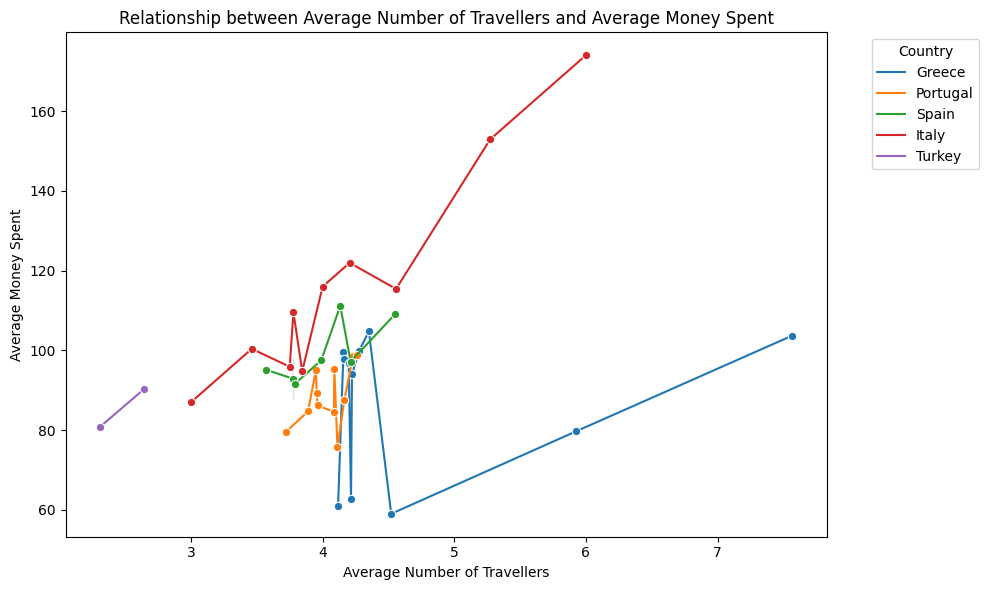

In [11]:
plot_travellers_vs_spending(successful)